In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import InceptionResNetV2



#Training


In [1]:
TRAINING_DATA_PATH = '/content/gdrive/MyDrive/plantdoc_classification/PlantDoc-Tomato/train'
TESTING_DATA_PATH = '/content/gdrive/MyDrive/plantdoc_classification/PlantDoc-Tomato/test'

IMAGE_SIZE = [224,224]
BATCH_SIZE = 32
LEARNING_RATE = 0.009
MOMENTUM = 0.9 
EPOCHS = 100
PATIENCE = 30
#CLASSES = len(glob('data/train'))
#constant
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
train = train_datagen.flow_from_directory(TRAINING_DATA_PATH,
                                                 target_size = (224,224),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test = test_datagen.flow_from_directory(TESTING_DATA_PATH,
                                            target_size = (224,224),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                            shuffle = False)


NameError: ignored

In [ ]:
model = MobileNet(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
  
for layer in model.layers[:-20]:
    layer.trainable = False 

layers = GlobalAveragePooling2D()(model.output)
  
layers = Dense(1024, activation='relu',name='fc1')(layers)
layers = Dropout(0.5,name='Dropout_1')(layers)
layers = BatchNormalization()(layers)
layers = Dense(512, activation='relu',name='fc2')(layers)
layers = Dropout(0.5,name = 'Dropout')(layers)
prediction = Dense(8,activation = 'softmax',name='output')(layers)

model = Model(inputs=model.input,outputs= prediction)



17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
SGD=optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM)
monitor = EarlyStopping(monitor = 'val_accuracy',min_delta=1e-3,verbose=1,restore_best_weights=True,patience=30)
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = SGD,
        metrics = ['accuracy']
)
cnn_model = model.fit_generator(train,
        validation_data = test,
        epochs = EPOCHS,
        steps_per_epoch = len(train)//10,
        callbacks = [monitor]

)
y_pred = model.predict(test)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - 39s 26s/step - loss: 2.8844 - accuracy: 0.1406 - val_loss: 2.2433 - val_accuracy: 0.0870
Epoch 2/100
2/2 [==============================] - 12s 8s/step - loss: 2.4351 - accuracy: 0.2656 - val_loss: 2.2579 - val_accuracy: 0.1304
Epoch 3/100
2/2 [==============================] - 10s 6s/step - loss: 2.7662 - accuracy: 0.2500 - val_loss: 2.3223 - val_accuracy: 0.2029
Epoch 4/100
2/2 [==============================] - 11s 8s/step - loss: 2.5217 - accuracy: 0.2500 - val_loss: 2.4425 - val_accuracy: 0.2319
Epoch 5/100
2/2 [==============================] - 8s 4s/step - loss: 2.0315 - accuracy: 0.3143 - val_loss: 2.4978 - val_accuracy: 0.2174
Epoch 6/100
2/2 [==============================] - 8s 2s/step - loss: 2.0340 - accuracy: 0.4571 - val_loss: 2.3862 - val_accuracy: 0.2029
Epoch 7/100
2/2 [==============================] - 10s 6s/step - loss: 2.0091 - accuracy: 0.3438 - val_loss: 2.5133 - val_accuracy: 0.2029
Epoch 8/100
2/2 [===========

100 more epochs


In [ ]:
SGD=optimizers.SGD(lr=LEARNING_RATE,momentum=MOMENTUM)
monitor = EarlyStopping(monitor = 'val_accuracy',min_delta=1e-3,verbose=1,restore_best_weights=True,patience=30)
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = SGD,
        metrics = ['accuracy']
)
cnn_model = model.fit_generator(train,
        validation_data = test,
        epochs = EPOCHS,
        steps_per_epoch = len(train)//10,
        callbacks = [monitor]

)
y_pred = model.predict(test)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
2/2 [==============================] - 9s 5s/step - loss: 0.8352 - accuracy: 0.7656 - val_loss: 5.2608 - val_accuracy: 0.2899
Epoch 2/100
2/2 [==============================] - 5s 4s/step - loss: 1.1482 - accuracy: 0.6562 - val_loss: 4.8243 - val_accuracy: 0.2899
Epoch 3/100
2/2 [==============================] - 4s 3s/step - loss: 0.8682 - accuracy: 0.7143 - val_loss: 4.5862 - val_accuracy: 0.2899
Epoch 4/100
2/2 [==============================] - 4s 3s/step - loss: 0.8564 - accuracy: 0.7344 - val_loss: 4.2627 - val_accuracy: 0.3043
Epoch 5/100
2/2 [==============================] - 4s 3s/step - loss: 0.7738 - accuracy: 0.7344 - val_loss: 4.1105 - val_accuracy: 0.3188
Epoch 6/100
2/2 [==============================] - 5s 4s/step - loss: 0.9831 - accuracy: 0.6719 - val_loss: 4.1423 - val_accuracy: 0.3188
Epoch 7/100
2/2 [==============================] - 5s 3s/step - loss: 0.8516 - accuracy: 0.6719 - val_loss: 4.1190 - val_accuracy: 0.3333
Epoch 8/100
2/2 [=================

In [ ]:
loss_train = cnn_model.history['loss']
loss_val = cnn_model.history['val_loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs,loss_train , 'g',label = 'Training Loss')
plt.plot(epochs,loss_val,'b', label ='validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
acc_train = cnn_model.history['accuracy']
acc_val = cnn_model.history['val_accuracy']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, acc_train , 'g',label = 'Training Accuracy')
plt.plot(epochs,acc_val,'b', label ='validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

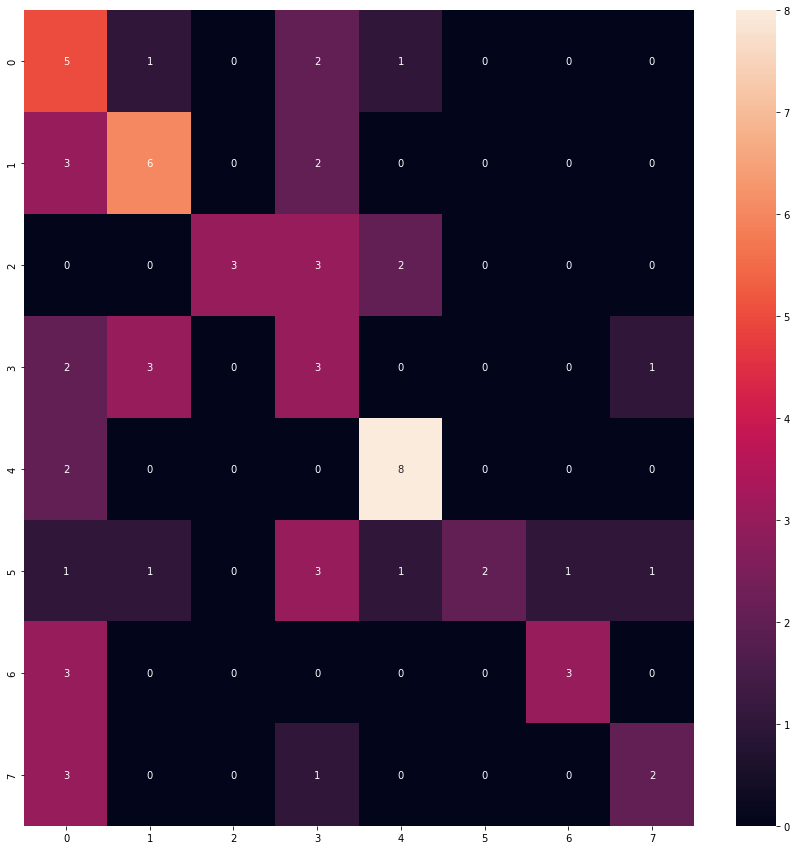

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
true_class = test.classes
class_label = list(test.class_indices.keys())
matrix = confusion_matrix(true_class,y_pred)
plt.figure(figsize=(15,15))
heatmap_confusion = sns.heatmap(matrix, annot=True, fmt="d");
report = classification_report(true_class, y_pred,zero_division=1,)


In [ ]:
model.save('/content/gdrive/MyDrive/plantdoc_classification/model46')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/plantdoc_classification/model46/assets


#Evaluating

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/gdrive/MyDrive/plantdoc_classification/model46')

In [ ]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis=1)
true_class = test.classes

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(true_class,y_pred)

0.463768115942029

In [ ]:
from sklearn.metrics import precision_score,recall_score
precision_score(true_class,y_pred,average='weighted')

0.6154153499691256

In [ ]:
recall_score(true_class,y_pred,average='weighted')

0.463768115942029

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from IPython.display import Image, display
from tensorflow.keras.models import load_model


test_dir = '/content/gdrive/MyDrive/plantdoc_classification/PlantDoc-Tomato/test'
img_size = (224,224)

class_label = ['Tomato Early blight leaf','Tomato Septoria leaf spot','Tomato leaf',
               'Tomato leaf bacterial spot','Tomato leaf late blight','Tomato leaf mosaic virus',
               'Tomato leaf yellow virus','Tomato mold leaf']





In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
class_label = list(test.class_indices.keys())

In [ ]:
test.class_indices.keys()==train.class_indices.keys()

True

In [ ]:
img_path='/content/gdrive/MyDrive/plantdoc_classification/PlantDoc-Tomato/test/Tomato mold leaf/dscn6689.jpg'

img = keras.preprocessing.image.load_img(img_path,target_size=img_size)
array = keras.preprocessing.image.img_to_array(img)
array = np.expand_dims(array,axis=0)
array = array/255.0
pred = model.predict(array)
pred_index = np.argmax(pred,axis=1)
print("The predicted class of image is: {}, probability : {}".format(class_label[int(pred_index)],sorted(pred[0,:],reverse=True)[0]))


The predicted class of image is: Tomato mold leaf, probability : 0.9305572509765625


GRAM-CAM

In [ ]:
import tensorflow as tf
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

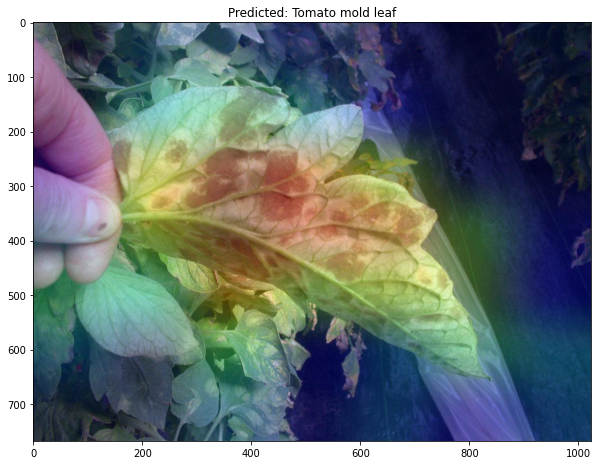

In [ ]:
fig = plt.figure(figsize=(10,10))
last_conv_layer_name='conv_pw_13_relu'
from matplotlib import cm
img_array = preprocess_input(get_img_array(img_path, size=img_size))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
cam_path = save_and_display_gradcam(img_path, heatmap)
title=(f"Predicted: {class_label[pred_index[0]]}")
plt.title(title)
plt.imshow(plt.imread(cam_path))

##trying to set weights of mobile net to trainable

In [ ]:
model2 = MobileNet(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
  
for layer in model2.layers[:-20]:
    layer.trainable = True 

layers = GlobalAveragePooling2D()(model2.output)
  
layers = Dense(1024, activation='relu',name='fc1')(layers)
layers = Dropout(0.5,name='Dropout_1')(layers)
layers = BatchNormalization()(layers)
layers = Dense(512, activation='relu',name='fc2')(layers)
layers = Dropout(0.5,name = 'Dropout')(layers)
prediction = Dense(8,activation = 'softmax',name='output')(layers)

model2 = Model(inputs=model2.input,outputs= prediction)


In [ ]:
adam=optimizers.Adam(lr=0.001)
model2.compile(
        loss = 'categorical_crossentropy',
        optimizer = adam,
        metrics = ['accuracy']
)
cnn_model2 = model2.fit_generator(train,
        validation_data = test,
        epochs = 300,
        steps_per_epoch = len(train)//10,

)
y_pred = model2.predict(test)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
2/2 [==============================] - 10s 5s/step - loss: 2.2711 - accuracy: 0.2031 - val_loss: 2.3906 - val_accuracy: 0.2174
Epoch 2/300
2/2 [==============================] - 5s 4s/step - loss: 2.0275 - accuracy: 0.3438 - val_loss: 2.6451 - val_accuracy: 0.1594
Epoch 3/300
2/2 [==============================] - 5s 4s/step - loss: 2.4152 - accuracy: 0.2188 - val_loss: 3.1039 - val_accuracy: 0.1884
Epoch 4/300
2/2 [==============================] - 5s 4s/step - loss: 1.7484 - accuracy: 0.3750 - val_loss: 3.3333 - val_accuracy: 0.2174
Epoch 5/300
2/2 [==============================] - 4s 3s/step - loss: 2.0120 - accuracy: 0.3281 - val_loss: 3.5667 - val_accuracy: 0.1884
Epoch 6/300
2/2 [==============================] - 5s 3s/step - loss: 2.2509 - accuracy: 0.3594 - val_loss: 4.0395 - val_accuracy: 0.1449
Epoch 7/300
2/2 [==============================] - 5s 4s/step - loss: 2.0935 - accuracy: 0.3906 - val_loss: 4.7883 - val_accuracy: 0.1159
Epoch 8/300
2/2 [================

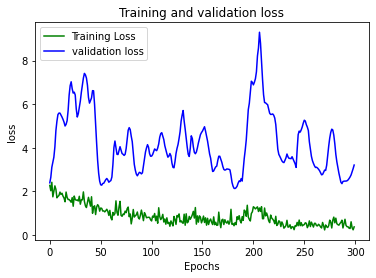

In [ ]:
loss_train = cnn_model2.history['loss']
loss_val = cnn_model2.history['val_loss']
epochs = range(300)
plt.plot(epochs,loss_train , 'g',label = 'Training Loss')
plt.plot(epochs,loss_val,'b', label ='validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel("loss")
plt.legend()
plt.show()

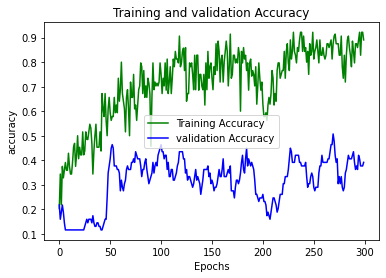

In [ ]:
acc_train = cnn_model2.history['accuracy']
acc_val = cnn_model2.history['val_accuracy']
epochs = range(300)
plt.plot(epochs, acc_train , 'g',label = 'Training Accuracy')
plt.plot(epochs,acc_val,'b', label ='validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

#Conclusion 
Accuracy around 40%